## Spam Classification using Natural Language Processing 
Utilizing Lemmatization, TFIDF, BOW and implementing Logistic Regression and Multinomial Naive Bayes . 

By Syed Faizan

In [239]:
import nltk

In [240]:
nltk.download('maxent_ne_chunker_tab')  # Named Entity Chunking Model
nltk.download('words')              # Word List
nltk.download('punkt_tab')              # Sentence Tokenizer
nltk.download('averaged_perceptron_tagger_tab')  # POS Tagger
nltk.download('stopwords')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading averaged_perceptron_tagger_tab: Package
[nltk_data]     'averaged_perceptron_tagger_tab' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [241]:
import pandas as pd

In [242]:
spam = pd.read_csv("spam.csv", encoding= 'latin1')

In [243]:
spam.shape

(5572, 5)

In [244]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [245]:
spam = spam[['v1', 'v2']]

In [246]:
spam.columns = ['label', 'sms']

In [247]:
spam.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [248]:
# Data cleaning and preprocessing 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sfaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [249]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [250]:
print(stop_words)

{'ve', 'the', 'such', 'these', 'm', "it's", 'when', "hasn't", 'have', 'i', 'during', "she's", "shan't", 'herself', "mustn't", 'didn', 'their', 'an', 'own', "didn't", "you'd", 're', 'doesn', 'can', 'theirs', 'through', 'yourselves', 'does', 'against', 'me', 'same', 'been', 'in', 'being', 'shan', 'that', 'as', 'mustn', "mightn't", 'under', 'now', 'him', 'them', 'yours', 'any', 'ain', 'did', 'about', 'shouldn', "weren't", 'just', 'mightn', "that'll", 'her', 'will', 'we', 'himself', "couldn't", 'haven', 'above', 'then', 'but', 'all', 'what', 'll', 'with', 'too', 'isn', 'those', 'not', 'more', "aren't", 'our', 'having', 'below', 'myself', "hadn't", 'further', 'couldn', 'both', 'had', 'where', 'only', 'because', 'hadn', 'wasn', 'itself', 'ours', 'was', "should've", 's', 'who', 'weren', 'most', 'aren', 'on', 'you', 'here', 'are', 'and', 'your', 'down', 'over', 'from', 'he', 'if', 'there', 'hasn', 'whom', 'before', 'how', "don't", 'has', 'why', 'ma', 'were', 'than', "isn't", "needn't", 'betwee

In [251]:
len(stop_words)

179

In [252]:
len(spam)

5572

In [253]:
spam_clean = []  
for i in range(len(spam)):
        data = re.sub("^a-zA-Z", " ", spam['sms'][i])
        data = data.lower()
        data = data.split()
        data = [lemmatizer.lemmatize(word) for word in data if not word in stop_words]
        data = ' '.join(data)
        spam_clean.append(data)

In [254]:
spam_clean

['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor... u c already say...',
 'nah think go usf, life around though',
 "freemsg hey darling 3 week's word back! i'd like fun still? tb ok! xxx std chgs send, å£1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'melle melle (oru minnaminunginte nurungu vettam)' set callertune callers. press *9 copy friend callertune",
 'winner!! valued network customer selected receivea å£900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobile 11 month more? u r entitled update latest colour mobile camera free! call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.",
 'six chance win 

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [256]:
tfidf = TfidfVectorizer(max_features= 3500, ngram_range= (2, 2))
Xgrams = tfidf.fit_transform(spam_clean)
X = tfidf.fit_transform(spam_clean).toarray()

In [257]:
import numpy as np

In [258]:
np.printoptions(edgeitems= 60, linewidth= 100000, 
                formatter= dict(float = lambda x: '%0.3g' % x))


In [259]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [260]:
y = spam[['label']]

In [261]:
y = pd.get_dummies(y, dtype = float)

In [262]:
print(y)

      label_ham  label_spam
0           1.0         0.0
1           1.0         0.0
2           0.0         1.0
3           1.0         0.0
4           1.0         0.0
...         ...         ...
5567        0.0         1.0
5568        1.0         0.0
5569        1.0         0.0
5570        1.0         0.0
5571        1.0         0.0

[5572 rows x 2 columns]


In [263]:
y = y.iloc[ :,  1].values

In [264]:
y.shape

(5572,)

In [265]:
tfidf.vocabulary_

{'ok lar': 2126,
 'free entry': 949,
 'wkly comp': 3413,
 'comp win': 642,
 'cup final': 713,
 'tkts 21st': 2990,
 'std txt': 2786,
 'txt rate': 3168,
 'rate apply': 2374,
 'think go': 2914,
 'freemsg hey': 983,
 'like fun': 1749,
 'treat like': 3094,
 'per request': 2244,
 'request melle': 2429,
 'melle melle': 1908,
 'melle oru': 1909,
 'oru minnaminunginte': 2180,
 'minnaminunginte nurungu': 1932,
 'nurungu vettam': 2107,
 'vettam set': 3265,
 'set callertune': 2638,
 'callertune callers': 373,
 'callers press': 372,
 'press copy': 2343,
 'copy friend': 687,
 'friend callertune': 991,
 'winner valued': 3400,
 'valued network': 3256,
 'network customer': 2035,
 'selected receivea': 2564,
 '900 prize': 166,
 'claim call': 518,
 'claim code': 520,
 'code kl341': 564,
 'kl341 valid': 1629,
 'valid 12': 3253,
 'hour only': 1481,
 'mobile 11': 1957,
 'entitled update': 846,
 'update latest': 3193,
 'latest colour': 1717,
 'colour mobile': 582,
 'camera free': 390,
 'free call': 942,
 'cal

In [266]:
from sklearn.model_selection import train_test_split
import numpy as np


# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:", X_train)
print("Testing Features:", X_test)

Training Features: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing Features: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [267]:
# Standardize features (recommended for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [268]:
# logistic regression 
from sklearn.linear_model import LogisticRegression

In [269]:
logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)


In [270]:
y_pred_logistic = logistic_model.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score, classification_report

In [272]:
accuracy_score(y_pred_logistic, y_test)

0.9775784753363229

In [309]:
print(f'The classification report for Logistic Regression is: \n {classification_report(y_pred_logistic, y_test)}') ##positive class represents spam.

The classification report for Logistic Regression is: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       974
         1.0       0.89      0.94      0.91       141

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [274]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

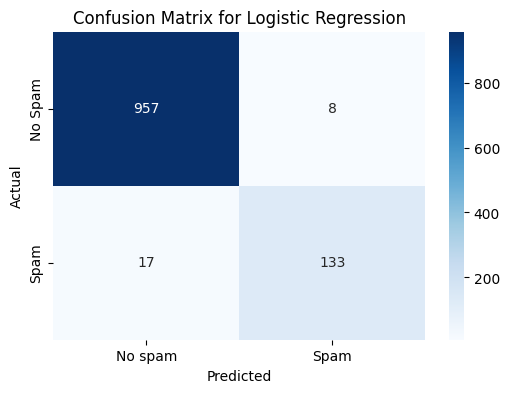

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [276]:
# Get probability scores for positive class
y_probabilities = logistic_model.predict_proba(X_test)

y_scores = y_probabilities[:, 1]





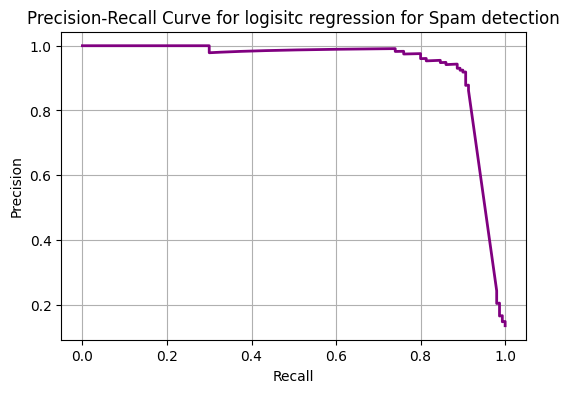

In [277]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the PR curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for logisitc regression for Spam detection')
plt.grid()
plt.show()

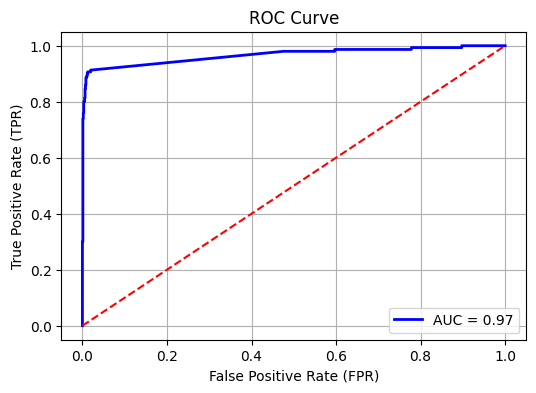

In [278]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color='red')  # Random model line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [279]:
X.shape

(5572, 3500)

In [280]:
# Get feature names (words corresponding to columns in X)
feature_names = tfidf.get_feature_names_out()

# Find the words corresponding to the first two columns (X[:, :2])
words_for_columns = feature_names[:2]
feature1 = words_for_columns[0]
feature2 = words_for_columns[1]
print(feature1, feature2)


00 sub 000 bonus


In [281]:
feature_names

array(['00 sub', '000 bonus', '000 cash', ..., 'ìï got', 'ìï still',
       'ìï wan'], dtype=object)

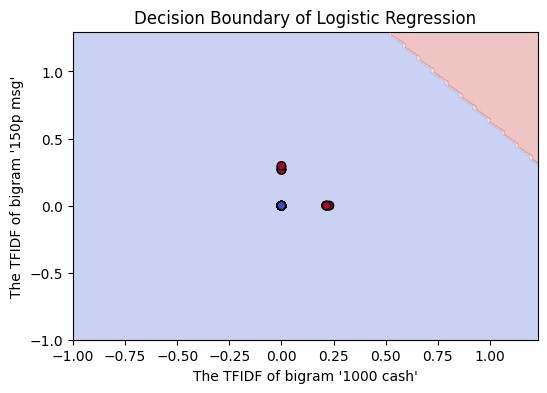

In [282]:
# Select two features for visualization
X_vis = X[:, :2]  
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression model
logistic_vis = LogisticRegression(solver='liblinear', random_state=42)
logistic_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logistic_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap="coolwarm", edgecolors='k')
plt.xlabel("The TFIDF of bigram '1000 cash'")
plt.ylabel("The TFIDF of bigram '150p msg'")
plt.title("Decision Boundary of Logistic Regression")
plt.show()


In [283]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [284]:
from sklearn.feature_extraction.text import CountVectorizer

In [285]:
cv = CountVectorizer(max_features= 3500,  binary = False, ngram_range= (2, 2))
Xgrams = cv.fit_transform(spam_clean)
X = cv.fit_transform(spam_clean).toarray()

In [286]:
y = spam[['label']]

In [287]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [288]:
y = pd.get_dummies(y, dtype = float)

y = y.iloc[:, 1].values

In [289]:
print(y)

[0. 0. 1. ... 0. 0. 0.]


In [290]:
from sklearn.model_selection import train_test_split
import numpy as np


# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:", X_train)
print("Testing Features:", X_test)

Training Features: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Features: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [291]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [292]:
model_NB = MultinomialNB().fit(X_train, y_train)

In [293]:
y_pred_NB = model_NB.predict(X_test)

In [294]:
y_scores_NB = model_NB.predict_proba(X_test)

In [295]:
y_scores_NB.shape

(1115, 2)

In [296]:
y_scores_NB = y_scores_NB[: , 1]

In [297]:
y_scores_NB

array([0.1339466 , 0.10341654, 0.93810352, ..., 0.1339466 , 0.05423781,
       0.99118202])

In [298]:
accuracy_score(y_test, y_pred_NB)

0.9739910313901345

In [307]:

print(f'The classification report for Naive Bayes is: \n {classification_report(y_test, y_pred_NB)}')

The classification report for Naive Bayes is: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       965
         1.0       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



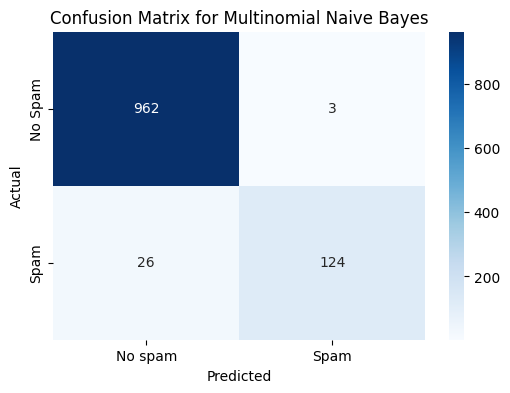

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()


In [301]:
# Get probability scores for positive class
y_probabilities = logistic_model.predict_proba(X_test)

y_scores_NB = y_probabilities[:, 1]

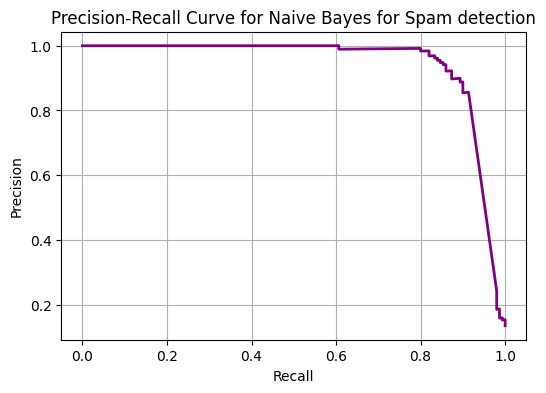

In [302]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_NB)

# Plot the PR curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes for Spam detection')
plt.grid()
plt.show()

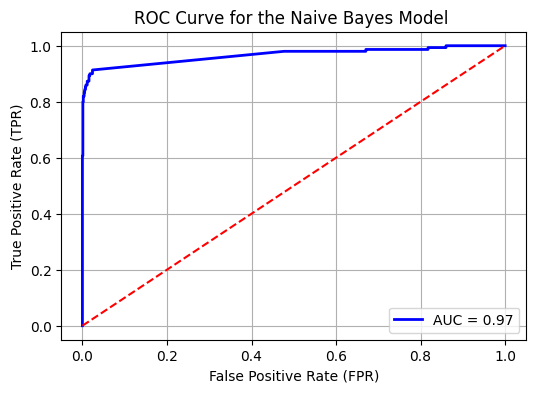

In [303]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores_NB)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color='red')  # Random model line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for the Naive Bayes Model ")
plt.legend()
plt.grid()
plt.show()
